[View in Colaboratory](https://colab.research.google.com/github/gamante91/pytorch_notebooks/blob/master/FullyConnectedNN_MNIST.ipynb)

In [66]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' #'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'
print('Platform:', platform, 'Accelerator:', accelerator)

!pip install --upgrade torch
!pip install --upgrade torchvision

Platform: cp36-cp36m Accelerator: cu80
Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (0.4.1)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.2.1)


In [59]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Torch', torch.__version__, 'CUDA', torch.version.cuda)
print('Device:', device)

Torch 0.4.1 CUDA 9.0.176
Device: cuda


In [0]:
# Hyper-parameter
batch_size = 100

# Load the MNIST dataset with torchvision 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [0]:
# Define Neural Network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(NeuralNet,self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,out_size)
        
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [62]:
# Instanciate the model
input_size = 784
hidden_size = 500
num_classes = 10

model = NeuralNet(input_size,hidden_size,num_classes).to(device)

print("Model description:\n", model)

Model description:
 NeuralNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=500, out_features=10, bias=True)
)


In [0]:
# Hyper-parameters
alpha = 0.001

# Construct loss function and optimizer
criterion = nn.CrossEntropyLoss()                           # Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr = alpha) # Stochastic Gradient Descent

Epoch: 0 loss: 2.273613691329956
Epoch: 1 loss: 2.2443509101867676
Epoch: 2 loss: 2.197798013687134
Epoch: 3 loss: 2.127786636352539
Epoch: 4 loss: 2.048485517501831
Epoch: 5 loss: 1.9188737869262695
Epoch: 6 loss: 1.7900259494781494
Epoch: 7 loss: 1.642038106918335
Epoch: 8 loss: 1.3607486486434937
Epoch: 9 loss: 1.1722816228866577
Epoch: 10 loss: 0.9695562720298767
Epoch: 11 loss: 0.9060817956924438
Epoch: 12 loss: 0.8617351055145264
Epoch: 13 loss: 0.7917794585227966
Epoch: 14 loss: 0.7191458344459534
Epoch: 15 loss: 0.6929659247398376
Epoch: 16 loss: 0.6754221320152283
Epoch: 17 loss: 0.5519986748695374
Epoch: 18 loss: 0.45546218752861023
Epoch: 19 loss: 0.483557790517807
Epoch: 20 loss: 0.586173415184021
Epoch: 21 loss: 0.4298493266105652
Epoch: 22 loss: 0.521624743938446
Epoch: 23 loss: 0.39270153641700745
Epoch: 24 loss: 0.4378627836704254
Epoch: 25 loss: 0.44466981291770935
Epoch: 26 loss: 0.37693899869918823
Epoch: 27 loss: 0.4073059856891632
Epoch: 28 loss: 0.4463300406932831

Text(0.5,0,'epoch')

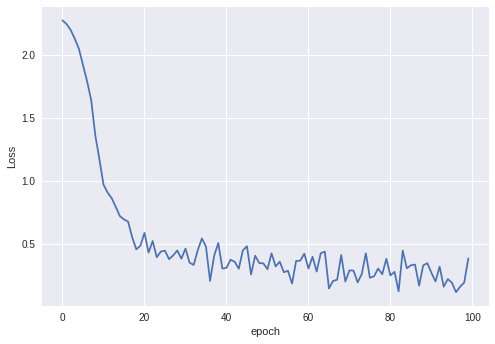

In [64]:
# Hyper-parameters 
num_epochs = 100
losses = []

# Train the model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model.forward(images)
        
        # Compute loss
        loss = criterion(outputs, labels)
    
        # Compute gradient and update model parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    losses.append(loss.item())
    print("Epoch:", epoch, "loss:", loss.item())

plt.plot(range(num_epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [65]:
# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model.forward(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
    
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model.forward(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 train images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 92.95 %
Accuracy of the network on the 10000 train images: 92.69333333333333 %
